In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


In [7]:
'''
(rows, features)
'''

print(train_data.shape, train_targets.shape)
print(test_data.shape, test_targets.shape)

(404, 13) (404,)
(102, 13) (102,)


In [9]:
print(train_data[0])
print(train_targets[0:20])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5]


In [8]:
import numpy as np

lengths = [len(x) for x in train_data]
print(lengths[0:10])
print("min", np.min(lengths))
print("max", np.max(lengths))
print("std", np.std(lengths))
print("mean", np.mean(lengths))


[13, 13, 13, 13, 13, 13, 13, 13, 13, 13]
min 13
max 13
std 0.0
mean 13.0


In [14]:
print("min", np.min(train_data))
print("max", np.max(train_data))
print("std", np.std(train_data))
print("mean", np.mean(train_data))

print("--------------")

print("min", np.min(train_targets))
print("max", np.max(train_targets))
print("std", np.std(train_targets))
print("mean", np.mean(train_targets))

min 0.0
max 711.0
std 144.39194712410696
mean 69.79277358530084
--------------
min 5.0
max 50.0
std 9.199035423364862
mean 22.395049504950492


In [11]:
for index in range(10):
    print(train_data[index], "->", train_targets[index])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] -> 15.2
[2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00] -> 42.3
[4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
 1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
 3.26000e+00] -> 50.0
[3.9610e-02 0.0000e+00 5.1900e+00 0.0000e+00 5.1500e-01 6.0370e+00
 3.4500e+01 5.9853e+00 5.0000e+00 2.2400e+02 2.0200e+01 3.9690e+02
 8.0100e+00] -> 21.1
[  3.69311   0.       18.1       0.        0.713     6.376    88.4
   2.5671   24.      666.       20.2     391.43     14.65   ] -> 17.7
[2.8392e-01 0.0000e+00 7.3800e+00 0.0000e+00 4.9300e-01 5.7080e+00
 7.4300e+01 4.7211e+00 5.0000e+00 2.8700e+02 1.9600e+01 3.9113e+02
 1.1740e+01] -> 18.5
[  9.18702   0.       18.1       0.        0.7       5.536   100.
   1.5804   24.      666.  

In [15]:
'''
because data is mutable
extracts mean by col
if you subtract the mean it means that now the data is zero centered
'''

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

mean=train_data.mean(axis=0)
train_data-=mean
std= train_data.std(axis=0)
train_data/=std



In [19]:
test_data-=mean
test_data/=std

In [18]:
print("min", np.min(train_data, axis=0))
print("max", np.max(train_data, axis=0))
print("std", np.std(train_data, axis=0))
print("mean", np.mean(train_data, axis=0))

min [-0.40510053 -0.48361547 -1.56469648 -0.25683275 -1.47126853 -3.81725032
 -2.36904226 -1.28750316 -0.97156928 -1.31131055 -2.67375227 -3.77110135
 -1.51966384]
max [9.23484718 3.72899018 2.44537425 3.89358447 2.67733525 3.46718635
 1.11048828 3.43740568 1.67588577 1.83609694 1.60353052 0.44807713
 3.48201936]
std [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
mean [-1.01541438e-16  1.09923072e-17  1.80933376e-15 -7.80453809e-17
 -5.25047552e-15  6.43187374e-15  2.98441140e-16  4.94653823e-16
  1.12671149e-17 -1.05526149e-16  2.36614908e-14  5.96710525e-15
  6.13920356e-16]


In [20]:
'''
if the data is small and you do an arbitrary split then you run the risk of not normal dist of data
if that is the case we do cross validation
here we do k-fold crossvalidation


so we have 404 datasets
4*101 

0 V T T T
1 T V T T
2 T T V T
3 T T T V
'''

'\nif the data is small and you do an arbitrary split then you run the risk of not normal dist of data\nif that is the case we do cross validation\nhere we do k-fold crossvalidation\n\n\nso we have 404 datasets\n4*101 \n\n0 V T T T\n1 T V T T\n2 T T V T\n3 T T T V\n'

In [21]:
from keras import models,layers

In [23]:
'''
squaring it is an amplifier, gives preference to smaller errors and causes bigger losses for bigger errors.
mse = mean(y_pred - y_true)^2
mae = mean(abs(y_pred - y_true))
'''


def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(13,)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1, activation="linear"))
    model.compile(
        optimizer="rmsprop",
        loss="mse",
        metrics=["mae"]    
    )
    return model

test_model = build_model()
test_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [39]:
'''
not much data hence batch size of 1
'''

k = 4
num_val_samples = len(train_data) //k
num_epoch = 100 #todo: go higher
histories = []

for i in range(k):
    print("Fold",i)
    
    val_data = train_data[i * num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i+1)*num_val_samples]

    left_data=train_data[0:i*num_val_samples]
    right_data=train_data[(i+1)*num_val_samples:]
    
    left_target=train_targets[0:i*num_val_samples]
    right_target=train_targets[(i+1)*num_val_samples:]
    
    partial_train_data = np.concatenate([left_data, right_data],axis=0)
    partial_train_targets = np.concatenate([left_target, right_target],axis=0)
    
    model = build_model()
    history = model.fit(
        partial_train_data, partial_train_targets,
        epochs = num_epoch,
        batch_size = 1,
        validation_data=(val_data, val_targets)
    )
    histories.append(history)
    

Fold 0
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 1s 2ms/step - loss: 203.3122 - mean_absolute_error: 10.8666 - val_loss: 34.5549 - val_mean_absolute_error: 4.0688
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 29.6994 - mean_absolute_error: 3.8137 - val_loss: 21.9884 - val_mean_absolute_error: 3.2405
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 22.2613 - mean_absolute_error: 3.2657 - val_loss: 17.9463 - val_mean_absolute_error: 2.8841
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 18.8785 - mean_absolute_error: 2.9482 - val_loss: 17.5600 - val_mean_absolute_error: 3.0904
Epoch 5/100
303/303 [==============================] - 0s 1ms/step - loss: 17.0532 - mean_absolute_error: 2.7776 - val_loss: 16.1505 - val_mean_absolute_error: 2.9825
Epoch 6/100
303/303 [==============================] - 0s 1ms/step - loss: 16.3192 - mean_absolute_error: 2.70

Epoch 50/100
303/303 [==============================] - 0s 1ms/step - loss: 6.8058 - mean_absolute_error: 1.7357 - val_loss: 7.8309 - val_mean_absolute_error: 2.0590
Epoch 51/100
303/303 [==============================] - 0s 1ms/step - loss: 6.6519 - mean_absolute_error: 1.6929 - val_loss: 8.8822 - val_mean_absolute_error: 2.1262
Epoch 52/100
303/303 [==============================] - 0s 1ms/step - loss: 6.8585 - mean_absolute_error: 1.7415 - val_loss: 7.9375 - val_mean_absolute_error: 2.0659
Epoch 53/100
303/303 [==============================] - 0s 1ms/step - loss: 5.8787 - mean_absolute_error: 1.6380 - val_loss: 10.3877 - val_mean_absolute_error: 2.4503
Epoch 54/100
303/303 [==============================] - 0s 1ms/step - loss: 6.8096 - mean_absolute_error: 1.7538 - val_loss: 7.8019 - val_mean_absolute_error: 1.9556
Epoch 55/100
303/303 [==============================] - 0s 1ms/step - loss: 6.6445 - mean_absolute_error: 1.7151 - val_loss: 8.1447 - val_mean_absolute_error: 2.0078
Epo

303/303 [==============================] - 0s 1ms/step - loss: 4.3887 - mean_absolute_error: 1.4453 - val_loss: 8.5012 - val_mean_absolute_error: 2.0610
Epoch 100/100
303/303 [==============================] - 0s 992us/step - loss: 4.3155 - mean_absolute_error: 1.4405 - val_loss: 9.3304 - val_mean_absolute_error: 2.1293
Fold 1
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 1s 2ms/step - loss: 201.6530 - mean_absolute_error: 10.4653 - val_loss: 23.6643 - val_mean_absolute_error: 3.6451
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 27.4417 - mean_absolute_error: 3.3653 - val_loss: 16.4290 - val_mean_absolute_error: 3.0171
Epoch 3/100
303/303 [==============================] - 0s 1ms/step - loss: 19.2661 - mean_absolute_error: 2.8125 - val_loss: 16.6696 - val_mean_absolute_error: 3.3216
Epoch 4/100
303/303 [==============================] - 0s 1ms/step - loss: 16.8627 - mean_absolute_error: 2.6244 - val_los

Epoch 48/100
303/303 [==============================] - 0s 1ms/step - loss: 6.3216 - mean_absolute_error: 1.5782 - val_loss: 9.0075 - val_mean_absolute_error: 2.2643
Epoch 49/100
303/303 [==============================] - 0s 1ms/step - loss: 5.7948 - mean_absolute_error: 1.6245 - val_loss: 10.3872 - val_mean_absolute_error: 2.4753
Epoch 50/100
303/303 [==============================] - 0s 1ms/step - loss: 6.1660 - mean_absolute_error: 1.6318 - val_loss: 9.4366 - val_mean_absolute_error: 2.3384
Epoch 51/100
303/303 [==============================] - 0s 1ms/step - loss: 6.2445 - mean_absolute_error: 1.6013 - val_loss: 8.6591 - val_mean_absolute_error: 2.2274
Epoch 52/100
303/303 [==============================] - 0s 1ms/step - loss: 6.0182 - mean_absolute_error: 1.5789 - val_loss: 9.1827 - val_mean_absolute_error: 2.3225
Epoch 53/100
303/303 [==============================] - 0s 1ms/step - loss: 5.7854 - mean_absolute_error: 1.5537 - val_loss: 8.6293 - val_mean_absolute_error: 2.1932
Epo

303/303 [==============================] - 0s 1ms/step - loss: 3.6785 - mean_absolute_error: 1.2780 - val_loss: 11.3591 - val_mean_absolute_error: 2.3173
Epoch 98/100
303/303 [==============================] - 0s 1ms/step - loss: 3.6721 - mean_absolute_error: 1.2305 - val_loss: 15.5606 - val_mean_absolute_error: 2.6001
Epoch 99/100
303/303 [==============================] - 0s 1ms/step - loss: 3.3466 - mean_absolute_error: 1.2851 - val_loss: 13.7779 - val_mean_absolute_error: 2.4999
Epoch 100/100
303/303 [==============================] - 0s 1ms/step - loss: 3.7460 - mean_absolute_error: 1.2557 - val_loss: 13.0657 - val_mean_absolute_error: 2.4214
Fold 2
Train on 303 samples, validate on 101 samples
Epoch 1/100
303/303 [==============================] - 1s 2ms/step - loss: 197.8487 - mean_absolute_error: 10.2124 - val_loss: 28.5300 - val_mean_absolute_error: 3.6303
Epoch 2/100
303/303 [==============================] - 0s 1ms/step - loss: 25.8719 - mean_absolute_error: 3.4761 - val_los

Epoch 46/100
303/303 [==============================] - 0s 1ms/step - loss: 4.7955 - mean_absolute_error: 1.4915 - val_loss: 12.6669 - val_mean_absolute_error: 2.3349
Epoch 47/100
303/303 [==============================] - 0s 1ms/step - loss: 4.6252 - mean_absolute_error: 1.5105 - val_loss: 13.8931 - val_mean_absolute_error: 2.5547
Epoch 48/100
303/303 [==============================] - 0s 1ms/step - loss: 4.9625 - mean_absolute_error: 1.5039 - val_loss: 13.7620 - val_mean_absolute_error: 2.5333
Epoch 49/100
303/303 [==============================] - 0s 1ms/step - loss: 4.5638 - mean_absolute_error: 1.5085 - val_loss: 13.5992 - val_mean_absolute_error: 2.4000
Epoch 50/100
303/303 [==============================] - 0s 1ms/step - loss: 4.7874 - mean_absolute_error: 1.4844 - val_loss: 13.1100 - val_mean_absolute_error: 2.3514
Epoch 51/100
303/303 [==============================] - 0s 1ms/step - loss: 4.3937 - mean_absolute_error: 1.4357 - val_loss: 12.8400 - val_mean_absolute_error: 2.463

303/303 [==============================] - 0s 1ms/step - loss: 3.1744 - mean_absolute_error: 1.2127 - val_loss: 13.8226 - val_mean_absolute_error: 2.5595
Epoch 96/100
303/303 [==============================] - 0s 1ms/step - loss: 2.8402 - mean_absolute_error: 1.1657 - val_loss: 16.9007 - val_mean_absolute_error: 2.6850
Epoch 97/100
303/303 [==============================] - 0s 1ms/step - loss: 3.0397 - mean_absolute_error: 1.1908 - val_loss: 14.4473 - val_mean_absolute_error: 2.6321
Epoch 98/100
303/303 [==============================] - 0s 1ms/step - loss: 2.9298 - mean_absolute_error: 1.1782 - val_loss: 15.1395 - val_mean_absolute_error: 2.5434
Epoch 99/100
303/303 [==============================] - 0s 1ms/step - loss: 3.1473 - mean_absolute_error: 1.2184 - val_loss: 13.5762 - val_mean_absolute_error: 2.4574
Epoch 100/100
303/303 [==============================] - 0s 1ms/step - loss: 2.8148 - mean_absolute_error: 1.2240 - val_loss: 14.2262 - val_mean_absolute_error: 2.5382
Fold 3
Tra

Epoch 44/100
303/303 [==============================] - 0s 1ms/step - loss: 6.1414 - mean_absolute_error: 1.6268 - val_loss: 12.2843 - val_mean_absolute_error: 2.4227
Epoch 45/100
303/303 [==============================] - 0s 1ms/step - loss: 6.4736 - mean_absolute_error: 1.6076 - val_loss: 13.0491 - val_mean_absolute_error: 2.6172
Epoch 46/100
303/303 [==============================] - 0s 1ms/step - loss: 6.2318 - mean_absolute_error: 1.6153 - val_loss: 16.8279 - val_mean_absolute_error: 3.1466
Epoch 47/100
303/303 [==============================] - 0s 1ms/step - loss: 6.3792 - mean_absolute_error: 1.7006 - val_loss: 12.7474 - val_mean_absolute_error: 2.4381
Epoch 48/100
303/303 [==============================] - 0s 1ms/step - loss: 5.9491 - mean_absolute_error: 1.5957 - val_loss: 12.0159 - val_mean_absolute_error: 2.4243
Epoch 49/100
303/303 [==============================] - 0s 1ms/step - loss: 5.6215 - mean_absolute_error: 1.5689 - val_loss: 16.4076 - val_mean_absolute_error: 2.919

303/303 [==============================] - 0s 1ms/step - loss: 4.0335 - mean_absolute_error: 1.3458 - val_loss: 10.9244 - val_mean_absolute_error: 2.3250
Epoch 94/100
303/303 [==============================] - 0s 1ms/step - loss: 4.1591 - mean_absolute_error: 1.3079 - val_loss: 10.5368 - val_mean_absolute_error: 2.2555
Epoch 95/100
303/303 [==============================] - 0s 1ms/step - loss: 4.2337 - mean_absolute_error: 1.2809 - val_loss: 11.9550 - val_mean_absolute_error: 2.4022
Epoch 96/100
303/303 [==============================] - 0s 1ms/step - loss: 3.8853 - mean_absolute_error: 1.3018 - val_loss: 12.3940 - val_mean_absolute_error: 2.5700
Epoch 97/100
303/303 [==============================] - 0s 1ms/step - loss: 3.7091 - mean_absolute_error: 1.2821 - val_loss: 11.7122 - val_mean_absolute_error: 2.3079
Epoch 98/100
303/303 [==============================] - 0s 1ms/step - loss: 3.8976 - mean_absolute_error: 1.3164 - val_loss: 11.8114 - val_mean_absolute_error: 2.3770
Epoch 99/10

In [32]:
print(histories[0].history)

{'val_loss': [38.35840059402814, 25.321700661143492, 22.600538277039583, 15.974486145873394, 16.076397170340364, 14.964295569090357, 13.51264776805033, 12.284773673653053, 11.920362230970081, 12.331536051485426], 'val_mean_absolute_error': [4.113626385679339, 3.140012306742149, 2.8629069564366105, 2.516922063166552, 2.600955113325969, 2.3759438070920433, 2.592834699271929, 2.301031934152735, 2.3887974578555267, 2.5268760813344824], 'loss': [215.97812456873842, 31.455566932301302, 23.514115857192767, 19.065450611256612, 16.856326250489854, 15.576735529128344, 15.109996375452136, 13.798809562595041, 13.407366913456025, 12.554408978128885], 'mean_absolute_error': [10.989526547221068, 3.8229639506576083, 3.2705550178049423, 2.920950071253005, 2.704373096868937, 2.646431551514679, 2.579066581851972, 2.5130955331002918, 2.418857960024289, 2.405466644677392]}


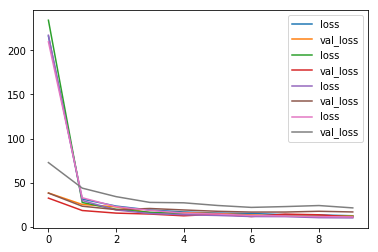

In [38]:
'''
epoch 10
'''
%matplotlib inline
import matplotlib.pyplot as plt

for history in histories:
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()



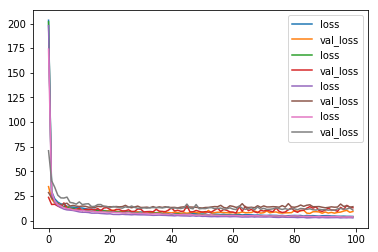

In [40]:
'''
epoch = 100
'''
%matplotlib inline
import matplotlib.pyplot as plt

for history in histories:
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()


In [41]:
model.save("100epoch_model.h5")

In [43]:
k = 4
num_val_samples = len(train_data) //k
num_epoch = 500 #todo: go higher
histories = []

for i in range(k):
    print("Fold",i)
    
    val_data = train_data[i * num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i * num_val_samples:(i+1)*num_val_samples]

    left_data=train_data[0:i*num_val_samples]
    right_data=train_data[(i+1)*num_val_samples:]
    
    left_target=train_targets[0:i*num_val_samples]
    right_target=train_targets[(i+1)*num_val_samples:]
    
    partial_train_data = np.concatenate([left_data, right_data],axis=0)
    partial_train_targets = np.concatenate([left_target, right_target],axis=0)
    
    model = build_model()
    history = model.fit(
        partial_train_data, partial_train_targets,
        epochs = num_epoch,
        batch_size = 1,
        validation_data=(val_data, val_targets)
    )
    histories.append(history)
    

Fold 0
Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 1s 3ms/step - loss: 175.6541 - mean_absolute_error: 10.0161 - val_loss: 29.6063 - val_mean_absolute_error: 3.6741
Epoch 2/500
303/303 [==============================] - 0s 1ms/step - loss: 23.5685 - mean_absolute_error: 3.4050 - val_loss: 18.9524 - val_mean_absolute_error: 2.9371
Epoch 3/500
303/303 [==============================] - 0s 1ms/step - loss: 18.3165 - mean_absolute_error: 2.9369 - val_loss: 16.2597 - val_mean_absolute_error: 2.5901
Epoch 4/500
303/303 [==============================] - 0s 1ms/step - loss: 16.0778 - mean_absolute_error: 2.7097 - val_loss: 13.5251 - val_mean_absolute_error: 2.4353
Epoch 5/500
303/303 [==============================] - 0s 1ms/step - loss: 14.4053 - mean_absolute_error: 2.6410 - val_loss: 14.1736 - val_mean_absolute_error: 2.4849
Epoch 6/500
303/303 [==============================] - 0s 1ms/step - loss: 13.7788 - mean_absolute_error: 2.48

Epoch 50/500
303/303 [==============================] - 0s 1ms/step - loss: 7.1602 - mean_absolute_error: 1.7717 - val_loss: 10.4269 - val_mean_absolute_error: 2.2555
Epoch 51/500
303/303 [==============================] - 0s 1ms/step - loss: 7.0807 - mean_absolute_error: 1.7178 - val_loss: 9.0009 - val_mean_absolute_error: 2.3745
Epoch 52/500
303/303 [==============================] - 0s 1ms/step - loss: 6.6407 - mean_absolute_error: 1.6210 - val_loss: 8.8882 - val_mean_absolute_error: 2.1738
Epoch 53/500
303/303 [==============================] - 0s 1ms/step - loss: 6.7592 - mean_absolute_error: 1.7502 - val_loss: 7.7330 - val_mean_absolute_error: 1.8909
Epoch 54/500
303/303 [==============================] - 0s 1ms/step - loss: 7.1696 - mean_absolute_error: 1.7283 - val_loss: 7.7434 - val_mean_absolute_error: 1.9423
Epoch 55/500
303/303 [==============================] - 0s 1ms/step - loss: 6.7139 - mean_absolute_error: 1.7047 - val_loss: 9.1536 - val_mean_absolute_error: 2.0301
Epo

303/303 [==============================] - 0s 1ms/step - loss: 4.2693 - mean_absolute_error: 1.4176 - val_loss: 9.4672 - val_mean_absolute_error: 2.4249
Epoch 100/500
303/303 [==============================] - 0s 1ms/step - loss: 4.4629 - mean_absolute_error: 1.3973 - val_loss: 8.4241 - val_mean_absolute_error: 2.2412
Epoch 101/500
303/303 [==============================] - 0s 1ms/step - loss: 4.4812 - mean_absolute_error: 1.3865 - val_loss: 8.2894 - val_mean_absolute_error: 2.0754
Epoch 102/500
303/303 [==============================] - 0s 1ms/step - loss: 4.6192 - mean_absolute_error: 1.4135 - val_loss: 8.7300 - val_mean_absolute_error: 2.2703
Epoch 103/500
303/303 [==============================] - 0s 1ms/step - loss: 4.4511 - mean_absolute_error: 1.3351 - val_loss: 7.6888 - val_mean_absolute_error: 2.2052
Epoch 104/500
303/303 [==============================] - 0s 1ms/step - loss: 4.2204 - mean_absolute_error: 1.4028 - val_loss: 11.2632 - val_mean_absolute_error: 2.6352
Epoch 105/5

Epoch 148/500
303/303 [==============================] - 0s 1ms/step - loss: 3.2791 - mean_absolute_error: 1.1898 - val_loss: 7.9354 - val_mean_absolute_error: 2.0769
Epoch 149/500
303/303 [==============================] - 0s 1ms/step - loss: 3.2134 - mean_absolute_error: 1.2150 - val_loss: 8.7960 - val_mean_absolute_error: 2.3001
Epoch 150/500
303/303 [==============================] - 0s 1ms/step - loss: 2.5668 - mean_absolute_error: 1.1049 - val_loss: 7.9760 - val_mean_absolute_error: 2.0922
Epoch 151/500
303/303 [==============================] - 0s 1ms/step - loss: 3.1130 - mean_absolute_error: 1.2333 - val_loss: 9.2165 - val_mean_absolute_error: 2.1438
Epoch 152/500
303/303 [==============================] - 0s 1ms/step - loss: 3.1576 - mean_absolute_error: 1.2033 - val_loss: 7.3308 - val_mean_absolute_error: 1.9368
Epoch 153/500
303/303 [==============================] - 0s 1ms/step - loss: 2.9242 - mean_absolute_error: 1.2241 - val_loss: 7.8325 - val_mean_absolute_error: 2.209

303/303 [==============================] - 0s 1ms/step - loss: 2.1950 - mean_absolute_error: 1.0554 - val_loss: 8.4899 - val_mean_absolute_error: 2.1229
Epoch 198/500
303/303 [==============================] - 0s 1ms/step - loss: 2.2147 - mean_absolute_error: 1.0823 - val_loss: 8.8294 - val_mean_absolute_error: 2.2857
Epoch 199/500
303/303 [==============================] - 0s 1ms/step - loss: 2.0639 - mean_absolute_error: 1.0284 - val_loss: 9.9701 - val_mean_absolute_error: 2.3928
Epoch 200/500
303/303 [==============================] - 0s 1ms/step - loss: 2.2480 - mean_absolute_error: 1.0530 - val_loss: 8.3741 - val_mean_absolute_error: 2.2015
Epoch 201/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1254 - mean_absolute_error: 1.0141 - val_loss: 7.9672 - val_mean_absolute_error: 2.1856
Epoch 202/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8525 - mean_absolute_error: 0.9812 - val_loss: 8.9444 - val_mean_absolute_error: 2.2474
Epoch 203/50

303/303 [==============================] - 0s 1ms/step - loss: 1.7194 - mean_absolute_error: 0.9635 - val_loss: 9.6514 - val_mean_absolute_error: 2.2929
Epoch 247/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5559 - mean_absolute_error: 0.8965 - val_loss: 8.9919 - val_mean_absolute_error: 2.2231
Epoch 248/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7771 - mean_absolute_error: 0.9366 - val_loss: 9.5263 - val_mean_absolute_error: 2.3568
Epoch 249/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5546 - mean_absolute_error: 0.9212 - val_loss: 9.1654 - val_mean_absolute_error: 2.2104
Epoch 250/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7603 - mean_absolute_error: 0.9676 - val_loss: 9.4541 - val_mean_absolute_error: 2.3995
Epoch 251/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6079 - mean_absolute_error: 0.9484 - val_loss: 9.2612 - val_mean_absolute_error: 2.3023
Epoch 252/50

303/303 [==============================] - 0s 1ms/step - loss: 1.1763 - mean_absolute_error: 0.8139 - val_loss: 10.9441 - val_mean_absolute_error: 2.5363
Epoch 296/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2125 - mean_absolute_error: 0.8073 - val_loss: 9.8063 - val_mean_absolute_error: 2.3837
Epoch 297/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3440 - mean_absolute_error: 0.8626 - val_loss: 8.2787 - val_mean_absolute_error: 2.2075
Epoch 298/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5240 - mean_absolute_error: 0.8666 - val_loss: 10.7700 - val_mean_absolute_error: 2.4325
Epoch 299/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3158 - mean_absolute_error: 0.8375 - val_loss: 8.9272 - val_mean_absolute_error: 2.2984
Epoch 300/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3331 - mean_absolute_error: 0.8861 - val_loss: 10.0898 - val_mean_absolute_error: 2.4323
Epoch 301

Epoch 344/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2241 - mean_absolute_error: 0.8353 - val_loss: 9.8627 - val_mean_absolute_error: 2.4031
Epoch 345/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2605 - mean_absolute_error: 0.8237 - val_loss: 11.7610 - val_mean_absolute_error: 2.4504
Epoch 346/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2188 - mean_absolute_error: 0.8136 - val_loss: 9.6766 - val_mean_absolute_error: 2.4403
Epoch 347/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2517 - mean_absolute_error: 0.8037 - val_loss: 9.2196 - val_mean_absolute_error: 2.3681
Epoch 348/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9955 - mean_absolute_error: 0.7632 - val_loss: 9.9315 - val_mean_absolute_error: 2.4186
Epoch 349/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1329 - mean_absolute_error: 0.8043 - val_loss: 10.0699 - val_mean_absolute_error: 2.3

Epoch 393/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9018 - mean_absolute_error: 0.7156 - val_loss: 9.5173 - val_mean_absolute_error: 2.3225
Epoch 394/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9228 - mean_absolute_error: 0.7190 - val_loss: 11.4107 - val_mean_absolute_error: 2.5247
Epoch 395/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0433 - mean_absolute_error: 0.7413 - val_loss: 13.0942 - val_mean_absolute_error: 2.6851
Epoch 396/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0238 - mean_absolute_error: 0.7451 - val_loss: 9.3784 - val_mean_absolute_error: 2.2775
Epoch 397/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9722 - mean_absolute_error: 0.7267 - val_loss: 9.9988 - val_mean_absolute_error: 2.3498
Epoch 398/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1611 - mean_absolute_error: 0.7859 - val_loss: 9.7041 - val_mean_absolute_error: 2.3

Epoch 442/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0713 - mean_absolute_error: 0.7391 - val_loss: 9.5439 - val_mean_absolute_error: 2.3376
Epoch 443/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0102 - mean_absolute_error: 0.6993 - val_loss: 9.7993 - val_mean_absolute_error: 2.2822
Epoch 444/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9849 - mean_absolute_error: 0.7298 - val_loss: 9.7309 - val_mean_absolute_error: 2.3614
Epoch 445/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8942 - mean_absolute_error: 0.6655 - val_loss: 10.6815 - val_mean_absolute_error: 2.3720
Epoch 446/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0206 - mean_absolute_error: 0.7188 - val_loss: 9.6133 - val_mean_absolute_error: 2.3668
Epoch 447/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8054 - mean_absolute_error: 0.6764 - val_loss: 11.1072 - val_mean_absolute_error: 2.4

303/303 [==============================] - 0s 1ms/step - loss: 0.7755 - mean_absolute_error: 0.6484 - val_loss: 9.7723 - val_mean_absolute_error: 2.3502
Epoch 491/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7610 - mean_absolute_error: 0.6520 - val_loss: 10.1345 - val_mean_absolute_error: 2.4126
Epoch 492/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9373 - mean_absolute_error: 0.6676 - val_loss: 9.3481 - val_mean_absolute_error: 2.3058
Epoch 493/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8440 - mean_absolute_error: 0.6824 - val_loss: 10.4939 - val_mean_absolute_error: 2.3320
Epoch 494/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8253 - mean_absolute_error: 0.6723 - val_loss: 9.3635 - val_mean_absolute_error: 2.2533
Epoch 495/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7617 - mean_absolute_error: 0.6261 - val_loss: 9.7830 - val_mean_absolute_error: 2.3051
Epoch 496/

Epoch 39/500
303/303 [==============================] - 0s 1ms/step - loss: 7.3774 - mean_absolute_error: 1.7657 - val_loss: 9.7934 - val_mean_absolute_error: 2.3321
Epoch 40/500
303/303 [==============================] - 0s 1ms/step - loss: 6.8436 - mean_absolute_error: 1.7601 - val_loss: 9.6847 - val_mean_absolute_error: 2.3592
Epoch 41/500
303/303 [==============================] - 0s 1ms/step - loss: 7.5123 - mean_absolute_error: 1.7386 - val_loss: 9.6570 - val_mean_absolute_error: 2.3518
Epoch 42/500
303/303 [==============================] - 0s 1ms/step - loss: 7.3153 - mean_absolute_error: 1.7647 - val_loss: 11.2153 - val_mean_absolute_error: 2.4796
Epoch 43/500
303/303 [==============================] - 0s 1ms/step - loss: 6.7508 - mean_absolute_error: 1.7353 - val_loss: 9.5397 - val_mean_absolute_error: 2.2686
Epoch 44/500
303/303 [==============================] - 0s 1ms/step - loss: 6.6979 - mean_absolute_error: 1.6954 - val_loss: 9.5515 - val_mean_absolute_error: 2.2573
Epo

303/303 [==============================] - 0s 1ms/step - loss: 4.1955 - mean_absolute_error: 1.4327 - val_loss: 14.5271 - val_mean_absolute_error: 2.4545
Epoch 89/500
303/303 [==============================] - 0s 1ms/step - loss: 4.1954 - mean_absolute_error: 1.4228 - val_loss: 14.6256 - val_mean_absolute_error: 2.4114
Epoch 90/500
303/303 [==============================] - 0s 1ms/step - loss: 3.8048 - mean_absolute_error: 1.3613 - val_loss: 24.6060 - val_mean_absolute_error: 3.1546
Epoch 91/500
303/303 [==============================] - 0s 1ms/step - loss: 4.1632 - mean_absolute_error: 1.3851 - val_loss: 18.3757 - val_mean_absolute_error: 2.7841
Epoch 92/500
303/303 [==============================] - 0s 1ms/step - loss: 4.0168 - mean_absolute_error: 1.3635 - val_loss: 19.1616 - val_mean_absolute_error: 2.6663
Epoch 93/500
303/303 [==============================] - 0s 1ms/step - loss: 3.8999 - mean_absolute_error: 1.3379 - val_loss: 14.5520 - val_mean_absolute_error: 2.5332
Epoch 94/50

Epoch 137/500
303/303 [==============================] - 0s 1ms/step - loss: 2.5598 - mean_absolute_error: 1.0852 - val_loss: 25.1747 - val_mean_absolute_error: 2.9121
Epoch 138/500
303/303 [==============================] - 0s 1ms/step - loss: 2.8403 - mean_absolute_error: 1.1710 - val_loss: 17.3335 - val_mean_absolute_error: 2.5708
Epoch 139/500
303/303 [==============================] - 0s 1ms/step - loss: 2.7404 - mean_absolute_error: 1.1480 - val_loss: 16.1654 - val_mean_absolute_error: 2.6026
Epoch 140/500
303/303 [==============================] - 0s 1ms/step - loss: 2.5621 - mean_absolute_error: 1.1713 - val_loss: 19.0922 - val_mean_absolute_error: 2.5458
Epoch 141/500
303/303 [==============================] - 0s 1ms/step - loss: 2.4654 - mean_absolute_error: 1.1276 - val_loss: 16.8500 - val_mean_absolute_error: 2.5771
Epoch 142/500
303/303 [==============================] - 0s 1ms/step - loss: 2.5117 - mean_absolute_error: 1.1220 - val_loss: 25.8467 - val_mean_absolute_error:

Epoch 186/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9719 - mean_absolute_error: 1.0356 - val_loss: 26.3009 - val_mean_absolute_error: 2.9522
Epoch 187/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8780 - mean_absolute_error: 0.9611 - val_loss: 19.3957 - val_mean_absolute_error: 2.5412
Epoch 188/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9570 - mean_absolute_error: 1.0057 - val_loss: 20.4936 - val_mean_absolute_error: 2.5595
Epoch 189/500
303/303 [==============================] - 0s 1ms/step - loss: 2.0342 - mean_absolute_error: 0.9825 - val_loss: 26.3908 - val_mean_absolute_error: 2.8053
Epoch 190/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7664 - mean_absolute_error: 0.9669 - val_loss: 22.6513 - val_mean_absolute_error: 2.7457
Epoch 191/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9257 - mean_absolute_error: 1.0184 - val_loss: 23.0422 - val_mean_absolute_error:

Epoch 235/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5464 - mean_absolute_error: 0.8888 - val_loss: 30.2769 - val_mean_absolute_error: 2.9571
Epoch 236/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6818 - mean_absolute_error: 0.9106 - val_loss: 35.0386 - val_mean_absolute_error: 3.3890
Epoch 237/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5483 - mean_absolute_error: 0.8756 - val_loss: 31.4573 - val_mean_absolute_error: 2.8167
Epoch 238/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5137 - mean_absolute_error: 0.8801 - val_loss: 34.5120 - val_mean_absolute_error: 3.0384
Epoch 239/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6626 - mean_absolute_error: 0.9482 - val_loss: 32.3519 - val_mean_absolute_error: 3.0193
Epoch 240/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4705 - mean_absolute_error: 0.8895 - val_loss: 34.6163 - val_mean_absolute_error:

Epoch 284/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2031 - mean_absolute_error: 0.7963 - val_loss: 32.4214 - val_mean_absolute_error: 2.8952
Epoch 285/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4273 - mean_absolute_error: 0.8561 - val_loss: 37.7332 - val_mean_absolute_error: 3.0624
Epoch 286/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2239 - mean_absolute_error: 0.7951 - val_loss: 36.8349 - val_mean_absolute_error: 3.0864
Epoch 287/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2335 - mean_absolute_error: 0.8048 - val_loss: 38.1548 - val_mean_absolute_error: 2.9948
Epoch 288/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3027 - mean_absolute_error: 0.8198 - val_loss: 35.6119 - val_mean_absolute_error: 2.9644
Epoch 289/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2963 - mean_absolute_error: 0.8072 - val_loss: 36.1206 - val_mean_absolute_error:

Epoch 333/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1050 - mean_absolute_error: 0.7735 - val_loss: 31.8964 - val_mean_absolute_error: 2.9415
Epoch 334/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0914 - mean_absolute_error: 0.7965 - val_loss: 28.4458 - val_mean_absolute_error: 2.9916
Epoch 335/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1882 - mean_absolute_error: 0.7750 - val_loss: 27.7481 - val_mean_absolute_error: 2.8479
Epoch 336/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0945 - mean_absolute_error: 0.7757 - val_loss: 38.2621 - val_mean_absolute_error: 3.3392
Epoch 337/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1694 - mean_absolute_error: 0.7992 - val_loss: 34.5789 - val_mean_absolute_error: 3.1029
Epoch 338/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0460 - mean_absolute_error: 0.7462 - val_loss: 42.3479 - val_mean_absolute_error:

Epoch 382/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0819 - mean_absolute_error: 0.7456 - val_loss: 30.4106 - val_mean_absolute_error: 2.9595
Epoch 383/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0015 - mean_absolute_error: 0.7173 - val_loss: 33.9631 - val_mean_absolute_error: 3.1322
Epoch 384/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1338 - mean_absolute_error: 0.7694 - val_loss: 30.8280 - val_mean_absolute_error: 3.0393
Epoch 385/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9362 - mean_absolute_error: 0.6990 - val_loss: 31.4370 - val_mean_absolute_error: 3.1152
Epoch 386/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0567 - mean_absolute_error: 0.7115 - val_loss: 33.0490 - val_mean_absolute_error: 3.0070
Epoch 387/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0068 - mean_absolute_error: 0.7092 - val_loss: 32.5476 - val_mean_absolute_error:

Epoch 431/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0692 - mean_absolute_error: 0.7397 - val_loss: 29.8949 - val_mean_absolute_error: 3.0309
Epoch 432/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9641 - mean_absolute_error: 0.7099 - val_loss: 32.0952 - val_mean_absolute_error: 3.0469
Epoch 433/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9093 - mean_absolute_error: 0.7054 - val_loss: 22.6131 - val_mean_absolute_error: 2.7770
Epoch 434/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9255 - mean_absolute_error: 0.7118 - val_loss: 25.5853 - val_mean_absolute_error: 2.8178
Epoch 435/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8491 - mean_absolute_error: 0.6785 - val_loss: 26.7579 - val_mean_absolute_error: 3.0384
Epoch 436/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0204 - mean_absolute_error: 0.7144 - val_loss: 27.1695 - val_mean_absolute_error:

Epoch 480/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8373 - mean_absolute_error: 0.6721 - val_loss: 24.1020 - val_mean_absolute_error: 2.9169
Epoch 481/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8287 - mean_absolute_error: 0.6484 - val_loss: 22.7899 - val_mean_absolute_error: 2.9022
Epoch 482/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8409 - mean_absolute_error: 0.6462 - val_loss: 27.8227 - val_mean_absolute_error: 3.0714
Epoch 483/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7923 - mean_absolute_error: 0.6620 - val_loss: 27.5622 - val_mean_absolute_error: 3.0751
Epoch 484/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9100 - mean_absolute_error: 0.6727 - val_loss: 24.7885 - val_mean_absolute_error: 2.9858
Epoch 485/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8856 - mean_absolute_error: 0.6723 - val_loss: 29.7742 - val_mean_absolute_error:

303/303 [==============================] - 0s 1ms/step - loss: 7.1593 - mean_absolute_error: 1.7880 - val_loss: 15.1453 - val_mean_absolute_error: 2.5026
Epoch 29/500
303/303 [==============================] - 0s 1ms/step - loss: 7.0020 - mean_absolute_error: 1.7303 - val_loss: 16.0364 - val_mean_absolute_error: 2.6196
Epoch 30/500
303/303 [==============================] - 0s 1ms/step - loss: 6.8420 - mean_absolute_error: 1.7931 - val_loss: 15.4312 - val_mean_absolute_error: 2.6970
Epoch 31/500
303/303 [==============================] - 0s 1ms/step - loss: 6.0723 - mean_absolute_error: 1.6717 - val_loss: 15.4421 - val_mean_absolute_error: 2.6401
Epoch 32/500
303/303 [==============================] - 0s 1ms/step - loss: 6.5850 - mean_absolute_error: 1.7534 - val_loss: 17.3014 - val_mean_absolute_error: 2.7409
Epoch 33/500
303/303 [==============================] - 0s 1ms/step - loss: 6.2244 - mean_absolute_error: 1.6702 - val_loss: 15.5005 - val_mean_absolute_error: 2.6041
Epoch 34/50

303/303 [==============================] - 0s 1ms/step - loss: 3.6520 - mean_absolute_error: 1.3601 - val_loss: 16.9560 - val_mean_absolute_error: 2.8612
Epoch 78/500
303/303 [==============================] - 0s 1ms/step - loss: 3.4675 - mean_absolute_error: 1.3390 - val_loss: 18.2728 - val_mean_absolute_error: 3.0757
Epoch 79/500
303/303 [==============================] - 0s 1ms/step - loss: 3.0644 - mean_absolute_error: 1.2630 - val_loss: 16.3105 - val_mean_absolute_error: 2.6676
Epoch 80/500
303/303 [==============================] - 0s 1ms/step - loss: 3.4146 - mean_absolute_error: 1.3557 - val_loss: 17.6593 - val_mean_absolute_error: 2.9259
Epoch 81/500
303/303 [==============================] - 0s 1ms/step - loss: 3.3304 - mean_absolute_error: 1.2737 - val_loss: 16.9471 - val_mean_absolute_error: 2.8060
Epoch 82/500
303/303 [==============================] - 0s 1ms/step - loss: 3.3945 - mean_absolute_error: 1.2893 - val_loss: 16.6024 - val_mean_absolute_error: 2.6232
Epoch 83/50

Epoch 126/500
303/303 [==============================] - 0s 1ms/step - loss: 2.3271 - mean_absolute_error: 1.0972 - val_loss: 17.9503 - val_mean_absolute_error: 2.9418
Epoch 127/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1362 - mean_absolute_error: 1.1035 - val_loss: 17.6118 - val_mean_absolute_error: 2.8764
Epoch 128/500
303/303 [==============================] - 0s 1ms/step - loss: 2.2625 - mean_absolute_error: 1.0875 - val_loss: 18.1138 - val_mean_absolute_error: 2.8880
Epoch 129/500
303/303 [==============================] - 0s 1ms/step - loss: 2.0876 - mean_absolute_error: 1.0025 - val_loss: 17.3918 - val_mean_absolute_error: 2.7849
Epoch 130/500
303/303 [==============================] - 0s 1ms/step - loss: 1.9717 - mean_absolute_error: 1.0295 - val_loss: 17.2643 - val_mean_absolute_error: 2.8688
Epoch 131/500
303/303 [==============================] - 0s 1ms/step - loss: 2.1614 - mean_absolute_error: 1.0780 - val_loss: 19.1657 - val_mean_absolute_error:

Epoch 175/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6326 - mean_absolute_error: 0.9415 - val_loss: 20.0259 - val_mean_absolute_error: 3.0821
Epoch 176/500
303/303 [==============================] - 0s 1ms/step - loss: 1.7397 - mean_absolute_error: 0.9651 - val_loss: 18.1319 - val_mean_absolute_error: 2.9141
Epoch 177/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5502 - mean_absolute_error: 0.8936 - val_loss: 18.8097 - val_mean_absolute_error: 2.8861
Epoch 178/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6610 - mean_absolute_error: 0.9411 - val_loss: 17.0008 - val_mean_absolute_error: 2.7784
Epoch 179/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6133 - mean_absolute_error: 0.9570 - val_loss: 17.5723 - val_mean_absolute_error: 2.7626
Epoch 180/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5498 - mean_absolute_error: 0.9165 - val_loss: 16.7284 - val_mean_absolute_error:

Epoch 224/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3016 - mean_absolute_error: 0.8523 - val_loss: 18.5875 - val_mean_absolute_error: 2.9654
Epoch 225/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3120 - mean_absolute_error: 0.8316 - val_loss: 16.8830 - val_mean_absolute_error: 2.8278
Epoch 226/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2339 - mean_absolute_error: 0.7951 - val_loss: 17.1176 - val_mean_absolute_error: 2.7570
Epoch 227/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3283 - mean_absolute_error: 0.8289 - val_loss: 16.8270 - val_mean_absolute_error: 2.7755
Epoch 228/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1678 - mean_absolute_error: 0.7721 - val_loss: 16.4944 - val_mean_absolute_error: 2.7115
Epoch 229/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3280 - mean_absolute_error: 0.8393 - val_loss: 18.2566 - val_mean_absolute_error:

Epoch 273/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0933 - mean_absolute_error: 0.7713 - val_loss: 18.2717 - val_mean_absolute_error: 2.9308
Epoch 274/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1083 - mean_absolute_error: 0.7415 - val_loss: 17.3603 - val_mean_absolute_error: 2.8090
Epoch 275/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0629 - mean_absolute_error: 0.7378 - val_loss: 17.3269 - val_mean_absolute_error: 2.8115
Epoch 276/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0815 - mean_absolute_error: 0.7566 - val_loss: 18.2450 - val_mean_absolute_error: 2.9227
Epoch 277/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0762 - mean_absolute_error: 0.7644 - val_loss: 16.9271 - val_mean_absolute_error: 2.7717
Epoch 278/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0495 - mean_absolute_error: 0.7752 - val_loss: 17.4524 - val_mean_absolute_error:

Epoch 322/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9943 - mean_absolute_error: 0.7043 - val_loss: 18.2033 - val_mean_absolute_error: 2.8974
Epoch 323/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0177 - mean_absolute_error: 0.7429 - val_loss: 16.7368 - val_mean_absolute_error: 2.6840
Epoch 324/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9563 - mean_absolute_error: 0.7504 - val_loss: 16.6408 - val_mean_absolute_error: 2.7098
Epoch 325/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9373 - mean_absolute_error: 0.7253 - val_loss: 18.1086 - val_mean_absolute_error: 2.8638
Epoch 326/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9782 - mean_absolute_error: 0.7222 - val_loss: 16.8538 - val_mean_absolute_error: 2.7067
Epoch 327/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8840 - mean_absolute_error: 0.6925 - val_loss: 18.0734 - val_mean_absolute_error:

Epoch 371/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8292 - mean_absolute_error: 0.6539 - val_loss: 18.9476 - val_mean_absolute_error: 2.9859
Epoch 372/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9031 - mean_absolute_error: 0.6861 - val_loss: 18.0535 - val_mean_absolute_error: 2.8384
Epoch 373/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7888 - mean_absolute_error: 0.6480 - val_loss: 16.3078 - val_mean_absolute_error: 2.7136
Epoch 374/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8170 - mean_absolute_error: 0.6551 - val_loss: 17.1587 - val_mean_absolute_error: 2.7425
Epoch 375/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8473 - mean_absolute_error: 0.7025 - val_loss: 16.8066 - val_mean_absolute_error: 2.6341
Epoch 376/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9105 - mean_absolute_error: 0.6805 - val_loss: 17.7834 - val_mean_absolute_error:

Epoch 420/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8514 - mean_absolute_error: 0.6393 - val_loss: 15.6376 - val_mean_absolute_error: 2.6856
Epoch 421/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7865 - mean_absolute_error: 0.6436 - val_loss: 16.7206 - val_mean_absolute_error: 2.7535
Epoch 422/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7478 - mean_absolute_error: 0.6199 - val_loss: 16.6763 - val_mean_absolute_error: 2.7401
Epoch 423/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6932 - mean_absolute_error: 0.6216 - val_loss: 17.1451 - val_mean_absolute_error: 2.8426
Epoch 424/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9362 - mean_absolute_error: 0.6693 - val_loss: 15.6359 - val_mean_absolute_error: 2.6898
Epoch 425/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8110 - mean_absolute_error: 0.6561 - val_loss: 15.9695 - val_mean_absolute_error:

Epoch 469/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7094 - mean_absolute_error: 0.6019 - val_loss: 15.5762 - val_mean_absolute_error: 2.6448
Epoch 470/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7289 - mean_absolute_error: 0.6301 - val_loss: 14.8896 - val_mean_absolute_error: 2.5484
Epoch 471/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7263 - mean_absolute_error: 0.6241 - val_loss: 15.9387 - val_mean_absolute_error: 2.6754
Epoch 472/500
303/303 [==============================] - 0s 1ms/step - loss: 0.6561 - mean_absolute_error: 0.5925 - val_loss: 14.8967 - val_mean_absolute_error: 2.5858
Epoch 473/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7598 - mean_absolute_error: 0.6410 - val_loss: 15.2349 - val_mean_absolute_error: 2.6461
Epoch 474/500
303/303 [==============================] - 0s 1ms/step - loss: 0.7461 - mean_absolute_error: 0.6415 - val_loss: 14.7500 - val_mean_absolute_error:

303/303 [==============================] - 0s 1ms/step - loss: 9.1529 - mean_absolute_error: 1.9742 - val_loss: 14.9626 - val_mean_absolute_error: 2.7480
Epoch 18/500
303/303 [==============================] - 0s 1ms/step - loss: 8.2912 - mean_absolute_error: 1.9452 - val_loss: 13.3027 - val_mean_absolute_error: 2.4555
Epoch 19/500
303/303 [==============================] - 0s 1ms/step - loss: 8.6712 - mean_absolute_error: 1.9814 - val_loss: 15.7115 - val_mean_absolute_error: 2.9319
Epoch 20/500
303/303 [==============================] - 0s 1ms/step - loss: 8.6483 - mean_absolute_error: 1.9776 - val_loss: 14.1954 - val_mean_absolute_error: 2.5091
Epoch 21/500
303/303 [==============================] - 0s 1ms/step - loss: 8.6218 - mean_absolute_error: 1.8824 - val_loss: 13.7753 - val_mean_absolute_error: 2.5127
Epoch 22/500
303/303 [==============================] - 0s 1ms/step - loss: 8.4714 - mean_absolute_error: 1.8696 - val_loss: 12.3266 - val_mean_absolute_error: 2.3321
Epoch 23/50

303/303 [==============================] - 0s 1ms/step - loss: 5.4454 - mean_absolute_error: 1.4913 - val_loss: 11.6105 - val_mean_absolute_error: 2.4867
Epoch 67/500
303/303 [==============================] - 0s 1ms/step - loss: 5.2707 - mean_absolute_error: 1.5063 - val_loss: 11.4767 - val_mean_absolute_error: 2.4523
Epoch 68/500
303/303 [==============================] - 0s 1ms/step - loss: 5.3421 - mean_absolute_error: 1.4845 - val_loss: 10.8556 - val_mean_absolute_error: 2.3001
Epoch 69/500
303/303 [==============================] - 0s 1ms/step - loss: 5.2037 - mean_absolute_error: 1.4133 - val_loss: 11.7894 - val_mean_absolute_error: 2.5138
Epoch 70/500
303/303 [==============================] - 0s 1ms/step - loss: 4.8689 - mean_absolute_error: 1.3849 - val_loss: 16.7238 - val_mean_absolute_error: 3.1634
Epoch 71/500
303/303 [==============================] - 0s 1ms/step - loss: 4.9573 - mean_absolute_error: 1.4254 - val_loss: 10.4508 - val_mean_absolute_error: 2.2344
Epoch 72/50

303/303 [==============================] - 0s 1ms/step - loss: 3.4661 - mean_absolute_error: 1.1990 - val_loss: 11.6460 - val_mean_absolute_error: 2.5039
Epoch 116/500
303/303 [==============================] - 0s 1ms/step - loss: 3.5307 - mean_absolute_error: 1.2256 - val_loss: 11.6488 - val_mean_absolute_error: 2.3942
Epoch 117/500
303/303 [==============================] - 0s 1ms/step - loss: 3.5858 - mean_absolute_error: 1.2167 - val_loss: 11.0573 - val_mean_absolute_error: 2.3715
Epoch 118/500
303/303 [==============================] - 0s 1ms/step - loss: 3.2610 - mean_absolute_error: 1.2050 - val_loss: 12.9139 - val_mean_absolute_error: 2.6460
Epoch 119/500
303/303 [==============================] - 0s 1ms/step - loss: 3.6593 - mean_absolute_error: 1.2230 - val_loss: 12.5558 - val_mean_absolute_error: 2.5584
Epoch 120/500
303/303 [==============================] - 0s 1ms/step - loss: 3.4473 - mean_absolute_error: 1.1976 - val_loss: 13.4971 - val_mean_absolute_error: 2.7478
Epoch 

Epoch 164/500
303/303 [==============================] - 0s 1ms/step - loss: 2.2288 - mean_absolute_error: 1.0490 - val_loss: 11.6220 - val_mean_absolute_error: 2.4390
Epoch 165/500
303/303 [==============================] - 0s 1ms/step - loss: 2.5161 - mean_absolute_error: 1.0720 - val_loss: 12.6347 - val_mean_absolute_error: 2.5622
Epoch 166/500
303/303 [==============================] - 0s 1ms/step - loss: 2.3967 - mean_absolute_error: 1.0257 - val_loss: 13.2791 - val_mean_absolute_error: 2.6744
Epoch 167/500
303/303 [==============================] - 0s 1ms/step - loss: 2.5256 - mean_absolute_error: 1.0896 - val_loss: 12.6213 - val_mean_absolute_error: 2.5731
Epoch 168/500
303/303 [==============================] - 0s 1ms/step - loss: 2.3674 - mean_absolute_error: 1.0838 - val_loss: 13.2773 - val_mean_absolute_error: 2.6499
Epoch 169/500
303/303 [==============================] - 0s 1ms/step - loss: 2.4172 - mean_absolute_error: 1.0411 - val_loss: 15.4405 - val_mean_absolute_error:

Epoch 213/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8772 - mean_absolute_error: 0.9631 - val_loss: 14.4082 - val_mean_absolute_error: 2.6931
Epoch 214/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6787 - mean_absolute_error: 0.9217 - val_loss: 13.5961 - val_mean_absolute_error: 2.6685
Epoch 215/500
303/303 [==============================] - 0s 1ms/step - loss: 2.0310 - mean_absolute_error: 0.9952 - val_loss: 12.7291 - val_mean_absolute_error: 2.5406
Epoch 216/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8133 - mean_absolute_error: 0.9417 - val_loss: 13.1789 - val_mean_absolute_error: 2.5314
Epoch 217/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8942 - mean_absolute_error: 0.9892 - val_loss: 12.6557 - val_mean_absolute_error: 2.4864
Epoch 218/500
303/303 [==============================] - 0s 1ms/step - loss: 1.8578 - mean_absolute_error: 0.9776 - val_loss: 13.4524 - val_mean_absolute_error:

Epoch 262/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6907 - mean_absolute_error: 0.9649 - val_loss: 14.7007 - val_mean_absolute_error: 2.6673
Epoch 263/500
303/303 [==============================] - 0s 1ms/step - loss: 1.5549 - mean_absolute_error: 0.9449 - val_loss: 14.6645 - val_mean_absolute_error: 2.7103
Epoch 264/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4824 - mean_absolute_error: 0.8900 - val_loss: 14.7674 - val_mean_absolute_error: 2.7821
Epoch 265/500
303/303 [==============================] - 0s 1ms/step - loss: 1.6075 - mean_absolute_error: 0.9014 - val_loss: 15.1292 - val_mean_absolute_error: 2.9211
Epoch 266/500
303/303 [==============================] - 0s 1ms/step - loss: 1.4078 - mean_absolute_error: 0.8698 - val_loss: 14.2064 - val_mean_absolute_error: 2.6330
Epoch 267/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3853 - mean_absolute_error: 0.8991 - val_loss: 14.7815 - val_mean_absolute_error:

Epoch 311/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2903 - mean_absolute_error: 0.8414 - val_loss: 15.6912 - val_mean_absolute_error: 2.8223
Epoch 312/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2217 - mean_absolute_error: 0.7816 - val_loss: 16.6328 - val_mean_absolute_error: 2.9095
Epoch 313/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3602 - mean_absolute_error: 0.8466 - val_loss: 16.5664 - val_mean_absolute_error: 2.8533
Epoch 314/500
303/303 [==============================] - 0s 1ms/step - loss: 1.2751 - mean_absolute_error: 0.8281 - val_loss: 17.3030 - val_mean_absolute_error: 3.0864
Epoch 315/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3486 - mean_absolute_error: 0.8271 - val_loss: 15.6141 - val_mean_absolute_error: 2.8262
Epoch 316/500
303/303 [==============================] - 0s 1ms/step - loss: 1.3986 - mean_absolute_error: 0.8450 - val_loss: 16.0301 - val_mean_absolute_error:

Epoch 360/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1333 - mean_absolute_error: 0.8206 - val_loss: 16.5919 - val_mean_absolute_error: 2.8503
Epoch 361/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1781 - mean_absolute_error: 0.7608 - val_loss: 15.4239 - val_mean_absolute_error: 2.6975
Epoch 362/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1068 - mean_absolute_error: 0.7602 - val_loss: 16.3697 - val_mean_absolute_error: 2.8878
Epoch 363/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1742 - mean_absolute_error: 0.7735 - val_loss: 15.8769 - val_mean_absolute_error: 2.8573
Epoch 364/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1201 - mean_absolute_error: 0.7620 - val_loss: 15.7440 - val_mean_absolute_error: 2.7853
Epoch 365/500
303/303 [==============================] - 0s 1ms/step - loss: 1.1063 - mean_absolute_error: 0.8007 - val_loss: 17.5130 - val_mean_absolute_error:

Epoch 409/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0082 - mean_absolute_error: 0.7399 - val_loss: 17.6806 - val_mean_absolute_error: 2.9934
Epoch 410/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0927 - mean_absolute_error: 0.7160 - val_loss: 18.4877 - val_mean_absolute_error: 3.1320
Epoch 411/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9964 - mean_absolute_error: 0.7488 - val_loss: 17.2302 - val_mean_absolute_error: 2.9227
Epoch 412/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9118 - mean_absolute_error: 0.6987 - val_loss: 16.0059 - val_mean_absolute_error: 2.7979
Epoch 413/500
303/303 [==============================] - 0s 1ms/step - loss: 1.0946 - mean_absolute_error: 0.7623 - val_loss: 17.2786 - val_mean_absolute_error: 2.9740
Epoch 414/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9986 - mean_absolute_error: 0.7462 - val_loss: 17.4367 - val_mean_absolute_error:

Epoch 458/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8903 - mean_absolute_error: 0.6869 - val_loss: 17.7239 - val_mean_absolute_error: 3.0527
Epoch 459/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9545 - mean_absolute_error: 0.7174 - val_loss: 16.7822 - val_mean_absolute_error: 2.9156
Epoch 460/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9044 - mean_absolute_error: 0.6863 - val_loss: 16.9759 - val_mean_absolute_error: 2.9614
Epoch 461/500
303/303 [==============================] - 0s 1ms/step - loss: 0.9067 - mean_absolute_error: 0.6994 - val_loss: 17.1598 - val_mean_absolute_error: 3.0637
Epoch 462/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8604 - mean_absolute_error: 0.6923 - val_loss: 16.2578 - val_mean_absolute_error: 2.9589
Epoch 463/500
303/303 [==============================] - 0s 1ms/step - loss: 0.8434 - mean_absolute_error: 0.6763 - val_loss: 18.1546 - val_mean_absolute_error:

In [44]:
model.save("500epoch_model.h5")

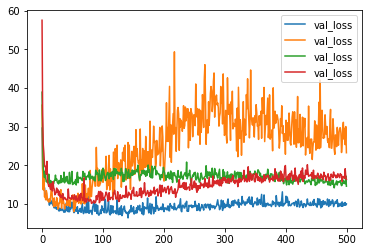

In [46]:
'''
epoch = 500
'''
%matplotlib inline
import matplotlib.pyplot as plt

for history in histories:
#     plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()


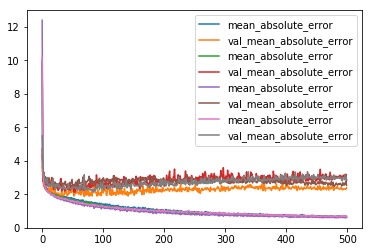

In [48]:
'''
epoch = 500
'''
%matplotlib inline
import matplotlib.pyplot as plt

for history in histories:
    plt.plot(history.history["mean_absolute_error"], label="mean_absolute_error")
    plt.plot(history.history["val_mean_absolute_error"], label="val_mean_absolute_error")
plt.legend()
plt.show()
plt.close()
